In [48]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
df = dict()
#Currently set for hemi = right hemisphere, meas= thickness

for meas in measures:

    df_list = list()

    for hemi in hemis:
        
        print(f'hemi={hemi}, meas={meas}')
        
        tsv_file=f'tsv/aparc_hemi-{hemi}_measure-{meas}_table.tsv'
        
        #when we read the table, we want the subject id to be the index.. 
        #this is a column that is labelled as {hemi}.aparc.{meas}
        #  so we can use the index_col option when reading the table.
        #  then we do a rename operation to make it a consistent name, like subject_id
        label_names = pd.read_table(tsv_file).columns[1:35]                
        
        
        df_list.append(
                pd.read_table(tsv_file)
                .rename(columns={f'{hemi}.aparc.{meas}':'subject_id'})
                .melt(id_vars=['subject_id'],value_vars=label_names, var_name='label',value_name=meas)
                .assign(hemi=lambda x: hemi)
                .assign(group=lambda x: x.subject_id.str[4:6]))
        
    df[meas] = pd.concat(df_list).reset_index()
#Code for getting measure specific data
        #df["thickness"]

hemi=lh, meas=thickness
hemi=rh, meas=thickness
hemi=lh, meas=volume
hemi=rh, meas=volume


In [263]:
#Lists
hemis = ['lh','rh']
measures = ['thickness','volume']

#tsv_file=f'/Users/kezamotlana/Documents/Western University/Codes and Data/Data Set/tsv/aparc_hemi-{hemis}_measure-{measures}_table.tsv'


df = dict()
#Currently set for hemi = right hemisphere, meas= thickness

for meas in measures:

    df_list = list()

    for hemi in hemis:
        
        #print(f'hemi={hemi}, meas={meas}')
        
        tsv_file=f'tsv/aparc_hemi-{hemi}_measure-{meas}_table.tsv'

        #when we read the table, we want the subject id to be the index.. 
        #this is a column that is labelled as {hemi}.aparc.{meas}
        #  so we can use the index_col option when reading the table.
        #  then we do a rename operation to make it a consistent name, like subject_id
        label_names = pd.read_table(tsv_file).columns[1:35]                
        
        df_list.append(
                pd.read_table(tsv_file)
                .rename(columns={f'{hemi}.aparc.{meas}':'subject_id'})
                .melt(id_vars=['subject_id'],value_vars=label_names, var_name='label',value_name=meas)
                .assign(hemi=lambda x: hemi)
                .assign(group=lambda x: x.subject_id.str[4:6]))
    
    df[meas] = pd.concat(df_list).reset_index()

thickness_data = df['thickness']
test = thickness_data[thickness_data.hemi=='rh'][thickness_data.label=='caudalmiddlefrontal'][thickness_data.group=='SZ'].thickness
#print(test)

<ipython-input-263-1a07caa11eb0>:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = thickness_data[thickness_data.hemi=='rh'][thickness_data.label=='caudalmiddlefrontal'][thickness_data.group=='SZ'].thickness


In [279]:
#THICKNESS DATA
#print("Healthy controls average of " + hemi + " " + label)
    
hemis=['lh','rh']
metrics=['thickness','volume']
significant_LH=[]
significant_RH=[]


#loop over metrics (thickness,volume)
for metric in metrics:
    thickness_data = df['thickness']
    #print(df_)
    
    #loop over regions
for label in label_names:
    df_ = df['thickness']
    #print(label)
    RH_controls_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
    LH_controls_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
    RH_patients_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()
    LH_patients_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()

    #print("RH controls for " + label + " " + str(RH_controls_data))
    #print("RH controls for " + label + " " + str(RH_controls_data))
    
    
 #HC subjects
    average_of_RH_controls_data=np.average(RH_controls_data)
    average_of_LH_controls_data=np.average(LH_controls_data)
            
#SZ subjects
    average_of_RH_patients_data=np.average(RH_patients_data)
    average_of_LH_patients_data=np.average(LH_patients_data)
    
    sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=set1, hue='Asset Subclass')
    
                    #T-test
    RH=scipy.stats.ttest_ind(RH_controls_data, RH_patients_data)

                #Ttest LH
    LH=scipy.stats.ttest_ind(LH_controls_data, LH_patients_data)
    print("    ")                       
    print ("Average Thickness of Healthy Controls' RH " + " " + label + " = " + str(average_of_RH_controls_data))
    print ("Average Thickness of Healthy Controls' LH " + " " + label + " = " + str(average_of_LH_controls_data))
    print("    ")
    print ("Average Thickness of Patients' RH " + " " + label + " = " + str(average_of_RH_patients_data))
    print ("Average Thickness of Patients' LH " + " " + label + " = " + str(average_of_LH_patients_data))
    print("    ")
    print("Right hemisphere T-test = " + str(RH))
    print("Left Hemisphere T-test = " + str(LH))
    if LH.pvalue<0.05: 
        print("   ")
        print("\033[1m" + "Left Hemisphrere Statistically significant" + "\033[0m")
        print("   ")
        significant_LH.append(label + " " + str(LH.pvalue))
    if RH.pvalue<0.05: 
        print("   ")
        print("\033[1m" + "Right Hemisphrere Statistically significant" + "\033[0m")
        print("   ")
        significant_RH.append(label + " " + str(RH.pvalue))
    print("    ")
    print("_______________________________________________________________________")

<ipython-input-279-2112f4c4ecb1>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RH_controls_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
<ipython-input-279-2112f4c4ecb1>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LH_controls_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
<ipython-input-279-2112f4c4ecb1>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RH_patients_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()
<ipython-input-279-2112f4c4ecb1>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LH_patients_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()


NameError: name 'set1' is not defined

In [278]:
#VOLUME DATA
#print("Healthy controls average of " + hemi + " " + label)
    
hemis=['lh','rh']
metrics=['thickness','volume']
significant_LH_volume=[]
significant_RH_volume=[]


#loop over metrics (thickness,volume)

for label in label_names:
    df_ = df['volume']
    #print(label)
    RH_controls_data_volume= df_[df_.hemi=='rh'][df_.label==label][df_.group=='HC'].volume.to_numpy()
    LH_controls_data_volume= df_[df_.hemi=='lh'][df_.label==label][df_.group=='HC'].volume.to_numpy()
    RH_patients_data_volume= df_[df_.hemi=='rh'][df_.label==label][df_.group=='SZ'].volume.to_numpy()
    LH_patients_data_volume= df_[df_.hemi=='lh'][df_.label==label][df_.group=='SZ'].volume.to_numpy()

    #print("RH controls for " + label + " " + str(RH_controls_data))
    #print("RH controls for " + label + " " + str(RH_controls_data))


 #HC subjects
    average_of_RH_controls_data_volume=np.average(RH_controls_data_volume)
    average_of_LH_controls_data_volume=np.average(LH_controls_data_volume)

#SZ subjects
    average_of_RH_patients_data_volume=np.average(RH_patients_data_volume)
    average_of_LH_patients_data_volume=np.average(LH_patients_data_volume)
                    #T-test
    RH_volume=scipy.stats.ttest_ind(RH_controls_data_volume, RH_patients_data_volume)

                #Ttest LH
    LH_volume=scipy.stats.ttest_ind(LH_controls_data_volume, LH_patients_data_volume)
    print("    ")                       
    print ("Average " + "volume" + " of Healthy Controls' RH " + " " + label + " = " + str(average_of_RH_controls_data_volume))
    print ("Average " + "volume" + " of Healthy Controls' LH " + " " + label + " = " + str(average_of_LH_controls_data_volume))
    print("    ")
    print ("Average " + "volume" + " of Patients' RH " + " " + label + " = " + str(average_of_RH_patients_data_volume))
    print ("Average " + "volume" + " of Patients' LH " + " " + label + " = " + str(average_of_LH_patients_data_volume))
    print("    ")
    print("Right hemisphere T-test = " + str(RH_volume))
    print("Left Hemisphere T-test = " + str(LH_volume))
    if LH.pvalue<0.05: 
        print("   ")
        print("\033[1m" + "Left Hemisphrere" + "volume" + " Statistically significant" + "\033[0m")
        print("   ")
        significant_LH_volume.append(label + " " + str(LH_volume.pvalue))
    if RH_volume.pvalue<0.05: 
        print("   ")
        print("\033[1m" + "Right Hemisphrere" + "volume" + " Statistically significant" + "\033[0m")
        print("   ")
        significant_RH_volume.append(label + " " + str(RH_volume.pvalue))
    print("    ")
    print("_______________________________________________________________________")

<ipython-input-278-d49af77df53e>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RH_controls_data_volume= df_[df_.hemi=='rh'][df_.label==label][df_.group=='HC'].volume.to_numpy()
<ipython-input-278-d49af77df53e>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LH_controls_data_volume= df_[df_.hemi=='lh'][df_.label==label][df_.group=='HC'].volume.to_numpy()
<ipython-input-278-d49af77df53e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RH_patients_data_volume= df_[df_.hemi=='rh'][df_.label==label][df_.group=='SZ'].volume.to_numpy()
<ipython-input-278-d49af77df53e>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  LH_patients_data_volume= df_[df_.hemi=='lh'][df_.label==label][df_.group=='SZ'].volume.to_numpy()


    
Average volume of Healthy Controls' RH  bankssts = 2023.7058823529412
Average volume of Healthy Controls' LH  bankssts = 2018.6470588235295
    
Average volume of Patients' RH  bankssts = 2021.375
Average volume of Patients' LH  bankssts = 2302.1875
    
Right hemisphere T-test = Ttest_indResult(statistic=0.019409852560181136, pvalue=0.9846385439950058)
Left Hemisphere T-test = Ttest_indResult(statistic=-2.015957184713013, pvalue=0.05254171735291149)
    
_______________________________________________________________________
    
Average volume of Healthy Controls' RH  caudalanteriorcingulate = 1729.5882352941176
Average volume of Healthy Controls' LH  caudalanteriorcingulate = 1648.0588235294117
    
Average volume of Patients' RH  caudalanteriorcingulate = 1848.625
Average volume of Patients' LH  caudalanteriorcingulate = 1606.8125
    
Right hemisphere T-test = Ttest_indResult(statistic=-0.718982777331259, pvalue=0.477536617310119)
Left Hemisphere T-test = Ttest_indResult(stat

    
Average volume of Healthy Controls' RH  parsorbitalis = 2530.5882352941176
Average volume of Healthy Controls' LH  parsorbitalis = 2255.823529411765
    
Average volume of Patients' RH  parsorbitalis = 2687.6875
Average volume of Patients' LH  parsorbitalis = 2195.25
    
Right hemisphere T-test = Ttest_indResult(statistic=-1.1102860674489001, pvalue=0.27541403756904986)
Left Hemisphere T-test = Ttest_indResult(statistic=0.4736798146705407, pvalue=0.6390473056534289)
    
_______________________________________________________________________
    
Average volume of Healthy Controls' RH  parstriangularis = 4087.4117647058824
Average volume of Healthy Controls' LH  parstriangularis = 3362.6470588235293
    
Average volume of Patients' RH  parstriangularis = 4446.625
Average volume of Patients' LH  parstriangularis = 3516.1875
    
Right hemisphere T-test = Ttest_indResult(statistic=-1.4986391404993713, pvalue=0.1440824790679404)
Left Hemisphere T-test = Ttest_indResult(statistic=-0.

In [274]:
#print(RH_control_data_display_dict.keys())
labelss=list(RH_control_data_display_dict.keys())
valuess=list(RH_control_data_display_dict.values())


#print(labelss)
test= RH_control_data_display_dict['bankssts']
plt.show(test)
#df_[df.hemi=='rh'][df_.label==label][df.group=='HC'].thickness.to_numpy()

KeyError: 'bankssts'

TypeError: unhashable type: 'list'

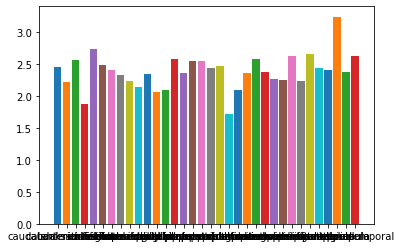

In [113]:
#, x='RH_control_data_display_dict.keys()', y='RH_control_data_display_dict.values()')
#Does not work = sns.barplot(data=RH_control_data_display_dict, x=labelss, y=valuess)
#Works: plt.bar(labelss, valuess)

for testplot in labelss: 
    plt.bar(testplot, RH_control_data_display_dict[testplot])
    

sns.barplot(data=RH_control_data_display_dict, x=labelss, y=valuess, hue="sex")

In [ ]:
#TEST
#THICKNESS DATA
#print("Healthy controls average of " + hemi + " " + label)
    
hemis=['lh','rh']
metrics=['thickness','volume']
significant_LH=[]
significant_RH=[]


#loop over metrics (thickness,volume)
for metric in metrics:
    thickness_data = df['thickness']
    #print(df_)
    
    #loop over regions
for label in label_names:
    for metric in metrics
    df_ = df['thickness']
    #print(label)
    RH_controls_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
    LH_controls_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='HC'].thickness.to_numpy()
    RH_patients_data= df_[df_.hemi=='rh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()
    LH_patients_data= df_[df_.hemi=='lh'][df_.label==label][df_.group=='SZ'].thickness.to_numpy()

    #print("RH controls for " + label + " " + str(RH_controls_data))
    #print("RH controls for " + label + " " + str(RH_controls_data))
    
    
 #HC subjects
    average_of_RH_controls_data=np.average(RH_controls_data)
    average_of_LH_controls_data=np.average(LH_controls_data)
            
#SZ subjects
    average_of_RH_patients_data=np.average(RH_patients_data)
    average_of_LH_patients_data=np.average(LH_patients_data)
    
    sns.pairplot(x_vars=['Std'], y_vars=['ATR'], data=set1, hue='Asset Subclass')
    
                    #T-test
    RH=scipy.stats.ttest_ind(RH_controls_data, RH_patients_data)

                #Ttest LH
    LH=scipy.stats.ttest_ind(LH_controls_data, LH_patients_data)
    print("    ")                       
    print ("Average Thickness of Healthy Controls' RH " + " " + label + " = " + str(average_of_RH_controls_data))
    print ("Average Thickness of Healthy Controls' LH " + " " + label + " = " + str(average_of_LH_controls_data))
    print("    ")
    print ("Average Thickness of Patients' RH " + " " + label + " = " + str(average_of_RH_patients_data))
    print ("Average Thickness of Patients' LH " + " " + label + " = " + str(average_of_LH_patients_data))
    print("    ")
    print("Right hemisphere T-test = " + str(RH))
    print("Left Hemisphere T-test = " + str(LH))
    if LH.pvalue<0.05: 
        print("   ")
        print("\033[1m" + "Left Hemisphrere Statistically significant" + "\033[0m")
        print("   ")
        significant_LH.append(label + " " + str(LH.pvalue))
    if RH.pvalue<0.05: 
        print("   ")
        print("\033[1m" + "Right Hemisphrere Statistically significant" + "\033[0m")
        print("   ")
        significant_RH.append(label + " " + str(RH.pvalue))
    print("    ")
    print("_______________________________________________________________________")